#Assignment 1

In [1]:
from __future__ import print_function
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
numpy.random.seed(seed=2015)

In [3]:
sizes = np.linspace(10,2000,100)

samples = {}

In [4]:
distributions = {}
distributions['chisq'] = {}
distributions['binomial'] = {}
distributions['poisson'] = {}
distributions['normal'] = {}
distributions['beta'] = {}
distributions['gamma'] = {}
for n in sizes:
    distributions['chisq'] [n] = np.random.chisquare(10, n)
    distributions['binomial'] [n] = np.random.binomial(16,0.625,n)
    distributions['poisson'] [n] = np.random.poisson(10,n)
    distributions['normal'] [n] = np.random.normal(10,9,n)
    distributions['beta'] [n] = np.random.beta(10,6,n)
    distributions['gamma'] [n] = np.random.gamma(5,2,n)

In [5]:
class distribution:
    def __init__(self, samples, name):
        
        fig = pl.figure(figsize = (10, 10))
        mean = fig.add_subplot(1,1,1)
        
        for nn in samples:
            mean.plot(nn, samples[nn].mean(), 'o')
            plt.xlabel(r'$sample size$', fontsize = 16)
            plt.ylabel(r'$mean$', fontsize = 16)
            plt.title(name+'_mean', fontsize = 20)
            
        fig1 = pl.figure(figsize = (10, 10))
        std = fig1.add_subplot(1,1,1)
        for nn in samples:
            std.plot(nn, samples[nn].std(), 'o')
            plt.xlabel(r'$sample size$', fontsize = 16)
            plt.ylabel(r'$std$', fontsize = 16)
            plt.title(name+'_std', fontsize = 20)
        
        samplemeans = []
        fig2 = pl.figure(figsize = (10, 10))
        meanhist = fig2.add_subplot(1,1,1)
        for nn in samples:
            samplemeans.append(samples[nn].mean())
            
        meanhist.hist(samplemeans,50,color='green',alpha=0.8)
        plt.xlabel(r'$mean of samples$', fontsize = 16)
        plt.ylabel(r'$count$', fontsize = 16)
        plt.title(name+'_histogram of mean', fontsize = 20)
        
def samplemeans(samples):
    samplemeans = []    
    for nn in samples:
        samplemeans.append(samples[nn].mean())  
    return samplemeans

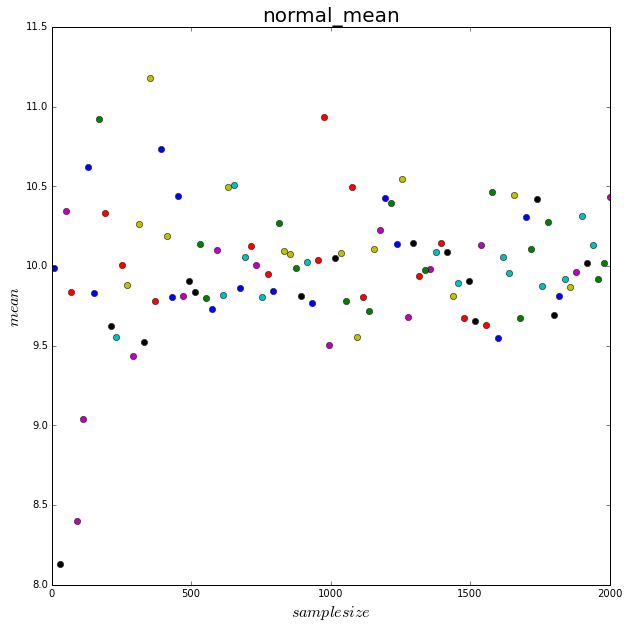

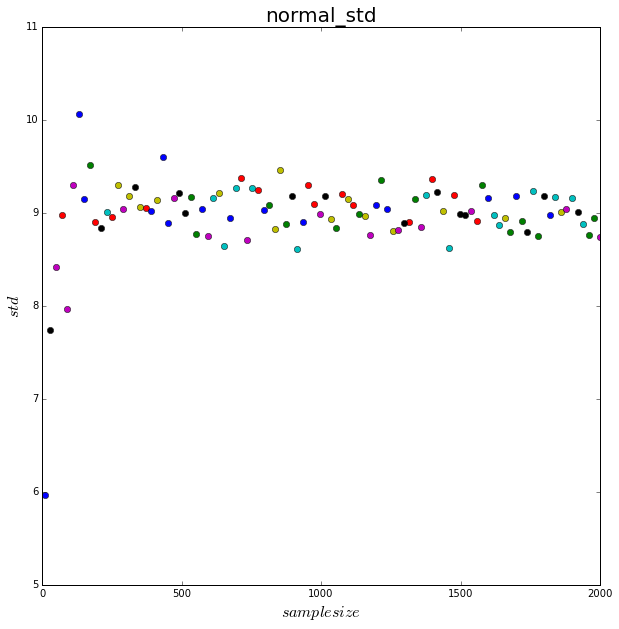

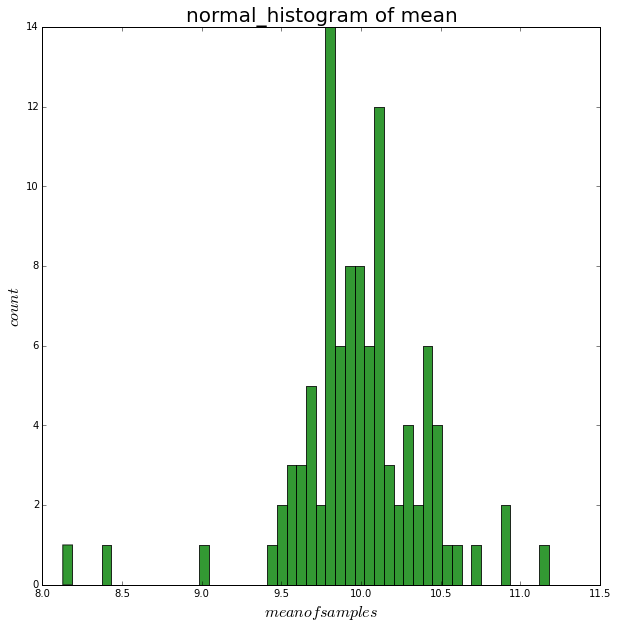

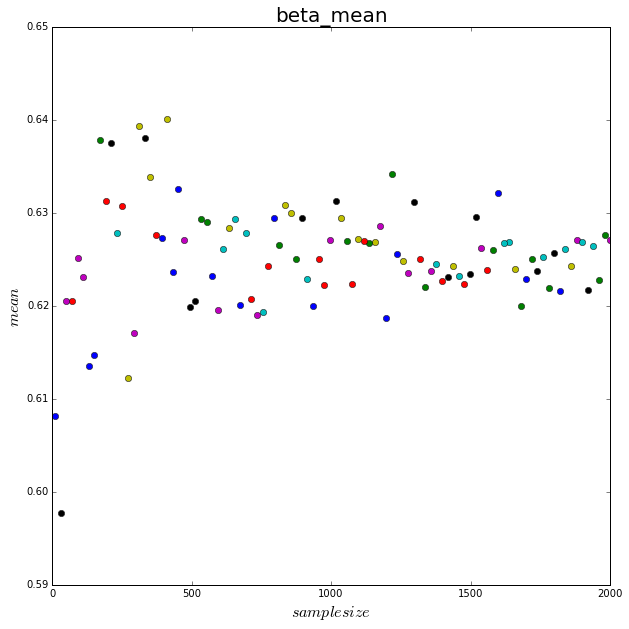

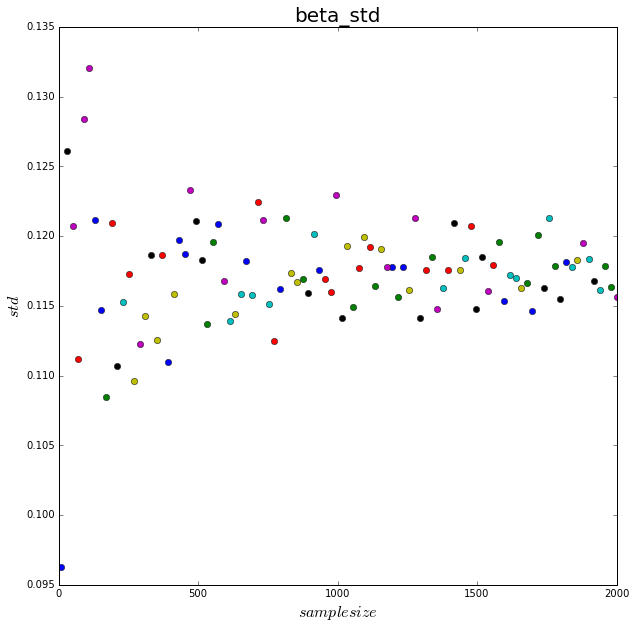

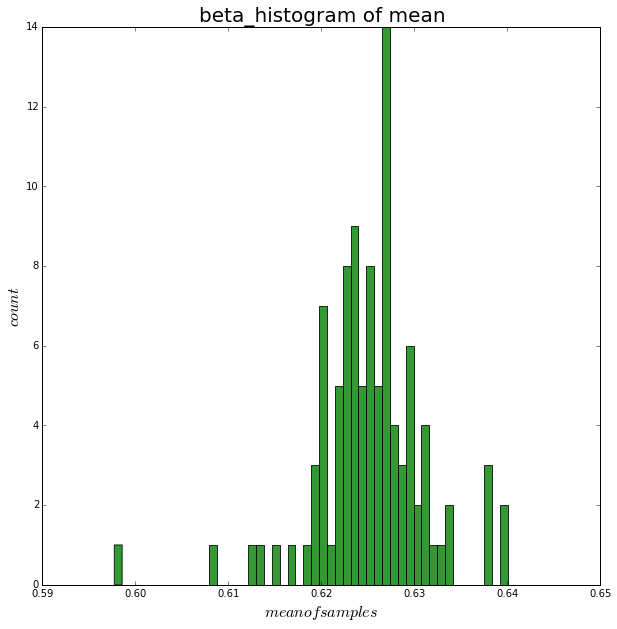

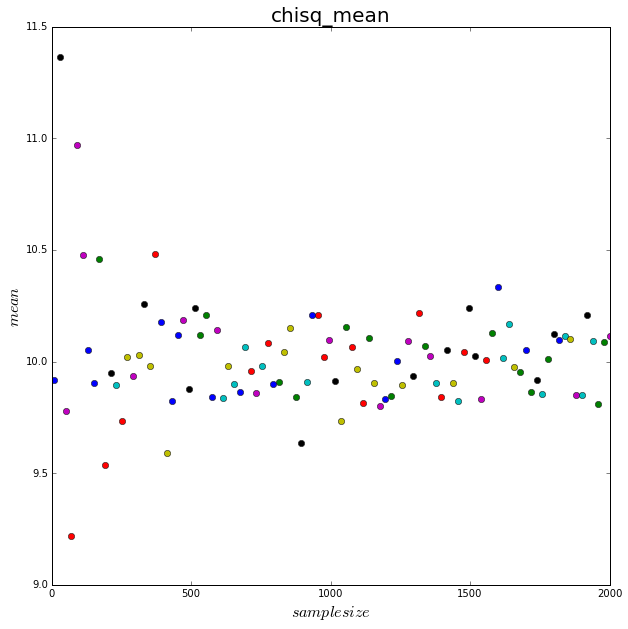

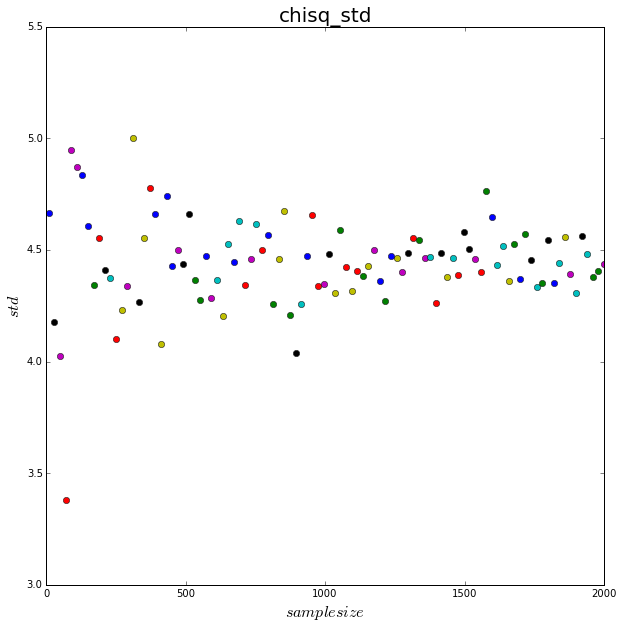

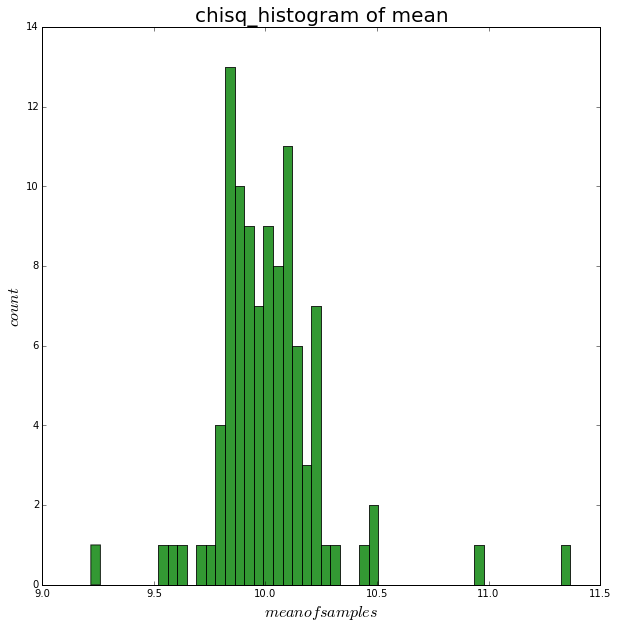

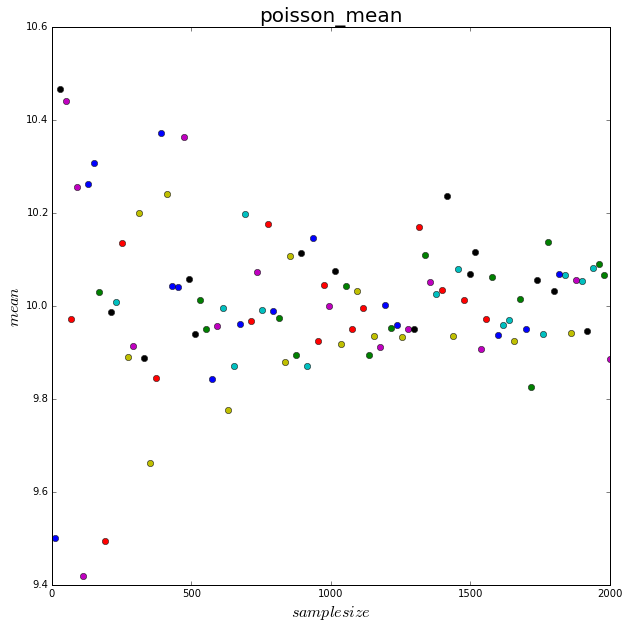

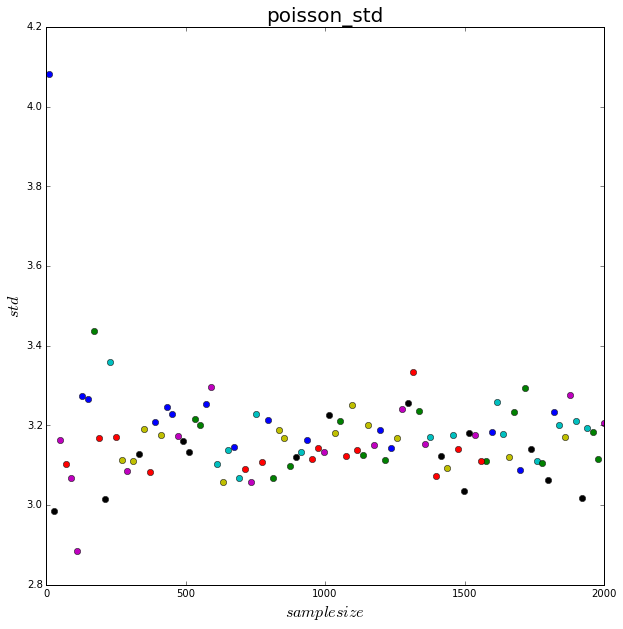

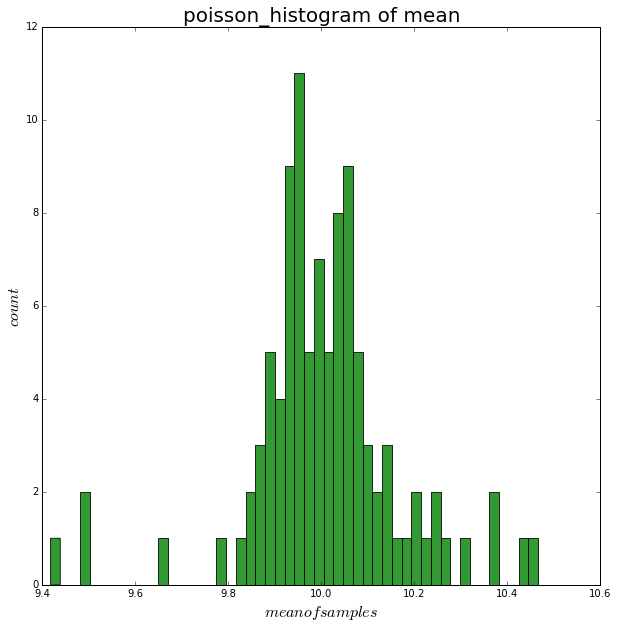

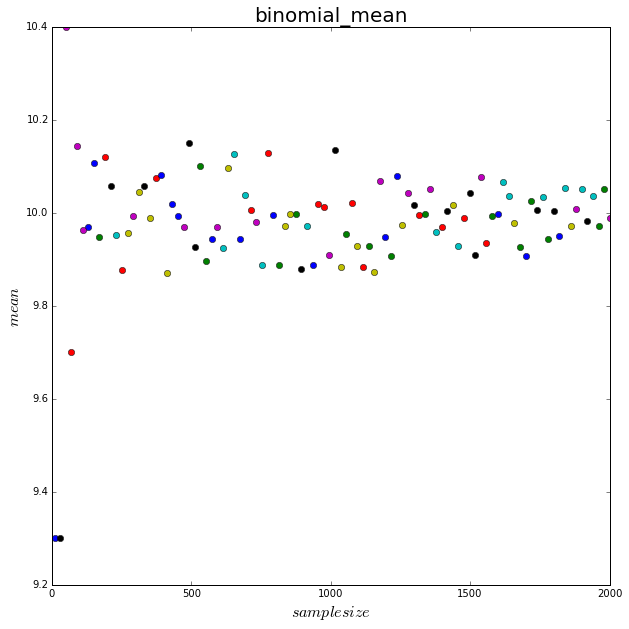

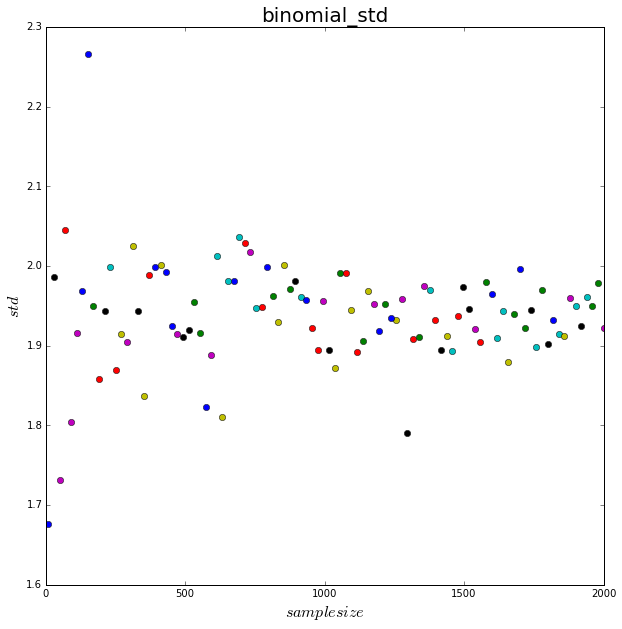

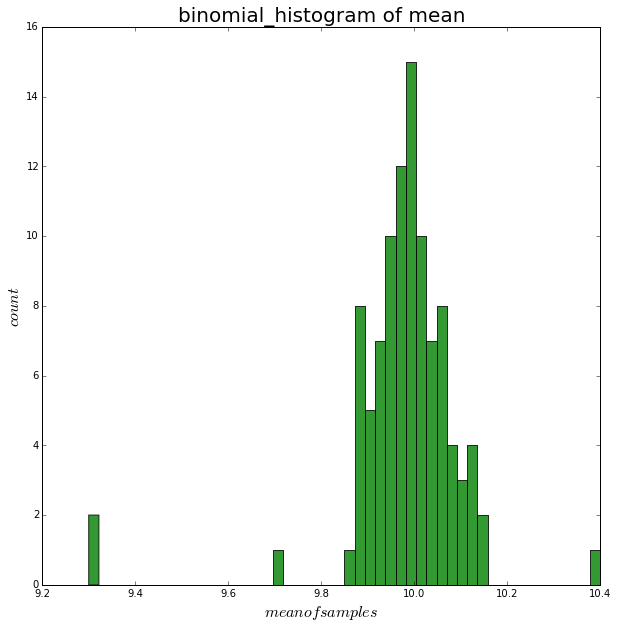

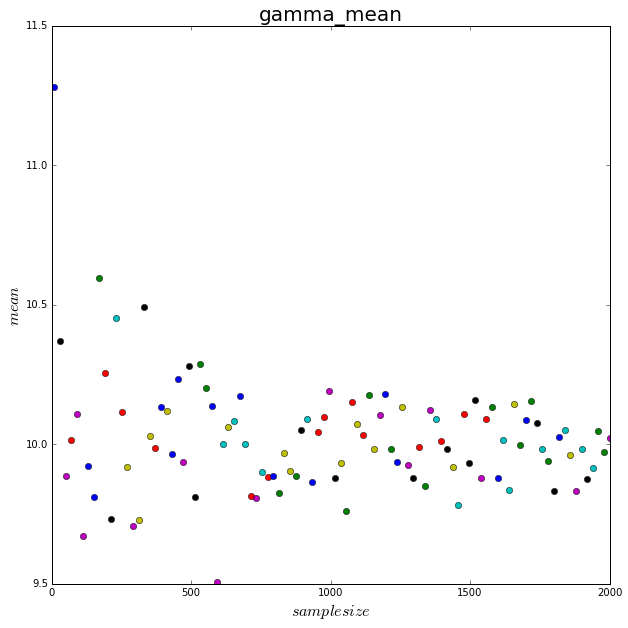

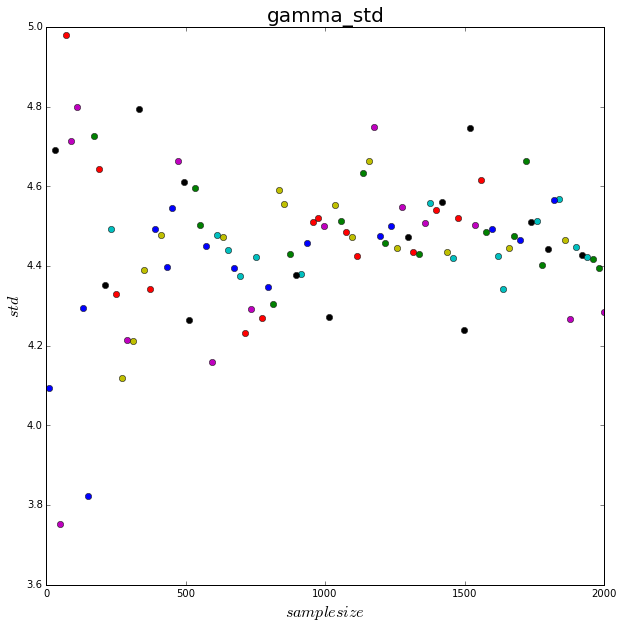

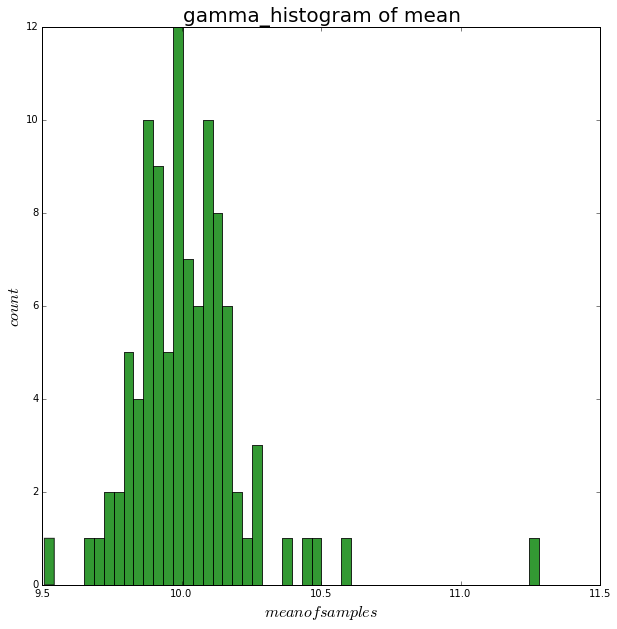

In [6]:
for k, v in distributions.iteritems():
    distribution(v, k)
    samples [k] = samplemeans(v)

#Comment  
According to the central limit theory, the more the sample size is, the more likely the mean of sample would converge to the mean of population.

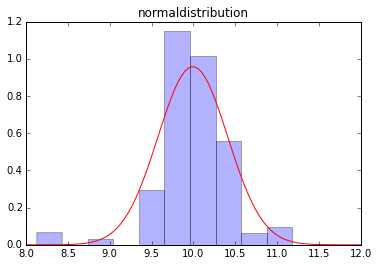

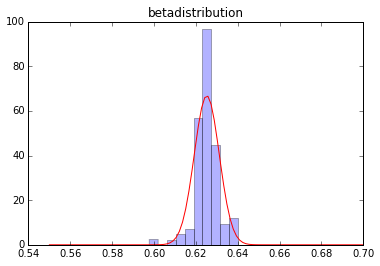

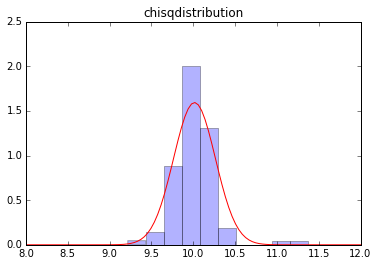

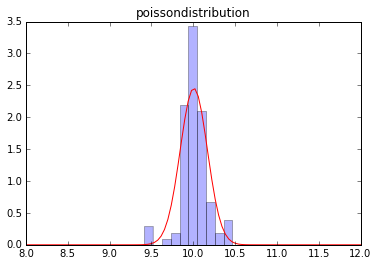

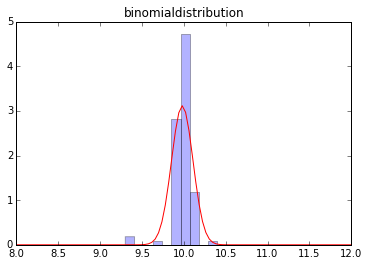

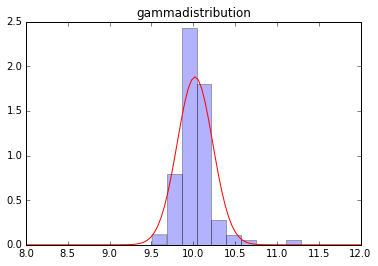

In [7]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title

for k, v in distributions.iteritems():
    # picking 150 of from a normal distrubution
    # with mean 0 and standard deviation 1
    samp = samples[k]
    param = norm.fit(samp) # distribution fitting
    # now, param[0] and param[1] are the mean and 
    # the standard deviation of the fitted distribution
    if k == 'beta':
        x = linspace(0.55,0.7,100)
    else:
        x = linspace(8,12,100)
    # fitted distribution
    pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])

    title(k + 'distribution')
    plot(x,pdf_fitted,'r-')
    hist(samp,normed=1,alpha=.3)
    show()